In [1]:
#For NLP
import spacy
sp = spacy.load('en_core_web_sm')

#For PDF reading
import PyPDF2

#For wordcloud
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [2]:
def take_second(elem):
    return elem[1]

In [3]:
def Convert(tup):
    di = dict(tup)
    return di

In [4]:
def DocToSents(doc):
    doc_dict = {}
    lst = []
    tokens = sp(doc)
    for sent in tokens.sents:
        lst.append(sent.string.strip())
    return(lst)

In [31]:
def WordFrequencies(sentence):
    
    nlp_sentence = sp(sentence)
    
    wordlist = []
    for word in nlp_sentence:
        if word.lemma_ not in (".", ",", "?", "!", "\n ", "\n"):
            wordlist.append(word.lemma_)
        
    wordfreq = []
    for w in wordlist:
        wordfreq.append(wordlist.count(w))
    
    dictionary = Convert(sorted(list(set(zip(wordlist, wordfreq))), key=take_second, reverse=True))
    
    return(dictionary)

In [32]:
def TwoWordFrequencies(sentence):  
    nlp_sentence = sp(sentence)
    
    wordlist = []
    for word in nlp_sentence:
        if word.lemma_ not in (".", ",", "?", "!", "\n ", "\n"):
            wordlist.append(word.lemma_)
    
    twowordfreq = []
    twowordlist = []
    
    for idx, val in enumerate(wordlist):
        try: 
            twowordlist.append(f"{wordlist[idx]} {wordlist[idx+1]}")
        except:
            break
    
    for w in twowordlist:
        twowordfreq.append(twowordlist.count(w))
    
    dictionary = Convert(sorted(list(set(zip(twowordlist, twowordfreq))), key=take_second, reverse=True))
    
    return(dictionary)
    

In [33]:
def ThreeWordFrequencies(sentence):  
    nlp_sentence = sp(sentence)
    
    wordlist = []
    for word in nlp_sentence:
        if word.lemma_ not in (".", ",", "?", "!", "\n ", "\n"):
            wordlist.append(word.lemma_)
    
    threewordfreq = []
    threewordlist = []
    
    for idx, val in enumerate(wordlist):
        try: 
            threewordlist.append(f"{wordlist[idx]} {wordlist[idx+1]} {wordlist[idx+2]}")
        except:
            break
    
    for w in threewordlist:
        threewordfreq.append(threewordlist.count(w))
    
    dictionary = Convert(sorted(list(set(zip(threewordlist, threewordfreq))), key=take_second, reverse=True))
    
    return(dictionary)

In [18]:
def PhraseFrequencies(text, phrase_length):
    if phrase_length == 1:
        result = WordFrequencies(text)
        
    elif phrase_length == 2:
        result = TwoWordFrequencies(text)
    
    elif phrase_length == 3:
        result = ThreeWordFrequencies(text)
        
    else:
        result = None
        
    return result

In [9]:
def DocumentFrequencies(doc, phrase_length):
    doc_dict = {}
    sentence_list = DocToSents(doc)
    for sentence in sentence_list:
        sentence_frequency = PhraseFrequencies(sentence, phrase_length)
        
        for key,value in sentence_frequency.items():
            if key not in doc_dict:
                doc_dict[key] = value
            elif key in doc_dict:
                doc_dict[key] += value
    
    sorted_tuples = sorted(doc_dict.items(), key=take_second, reverse = True)
    sorted_doc_dict = {k: v for k, v in sorted_tuples}
    
    wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(doc_dict)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
    return sorted_doc_dict

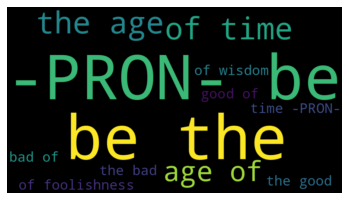

{'-PRON- be': 4,
 'be the': 4,
 'of time': 2,
 'the age': 2,
 'age of': 2,
 'the bad': 1,
 'the good': 1,
 'bad of': 1,
 'good of': 1,
 'time -PRON-': 1,
 'of wisdom': 1,
 'of foolishness': 1}

In [10]:
# Simple example
sentences = "it was the best of times it was the worst of times. it was the age of wisdom it was the age of foolishness."
DocumentFrequencies(sentences, 2)

In [37]:
def main():
    # creating a pdf file object
    pdfFileObj = open('Bantu Phonology.pdf', 'rb')

    # creating a pdf reader object
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

    # printing number of pages in pdf file
    print(pdfReader.numPages)

    docStr = ""
    # creating a page object
    for page in range(pdfReader.numPages):
        pageObj = pdfReader.getPage(page)
        pageText = pageObj.extractText()
        docStr += pageText

    print(DocumentFrequencies(docStr, 2))

    # closing the pdf file object
    pdfFileObj.close()

49


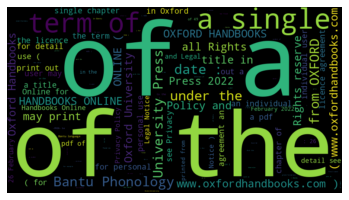

{'of a': 103, 'of the': 92, 'a single': 53, 'term of': 51, 'Bantu Phonology': 50, 'University Press': 50, 'under the': 50, 'date :': 50, 'from OXFORD': 49, 'www.oxfordhandbooks.com )': 49, 'OXFORD HANDBOOKS': 49, 'ONLINE (': 49, 'HANDBOOKS ONLINE': 49, '( www.oxfordhandbooks.com': 49, 'Oxford University': 49, 'Press 2022': 49, 'Rights reserve': 49, 'all Rights': 49, 'Policy and': 49, 'may print': 49, 'title in': 49, 'Oxford Handbooks': 49, 'single chapter': 49, 'the licence': 49, 'in Oxford': 49, 'a pdf': 49, '( for': 49, 'an individual': 49, 'a title': 49, 'use (': 49, 'print out': 49, 'licence agreement': 49, 'for personal': 49, 'user may': 49, 'see Privacy': 49, 'for detail': 49, 'personal use': 49, 'agreement an': 49, 'chapter of': 49, 'out a': 49, 'the term': 49, 'Online for': 49, 'individual user': 49, 'Handbooks Online': 49, 'Legal Notice': 49, 'Notice )': 49, 'and Legal': 49, 'detail see': 49, 'Privacy Policy': 49, 'pdf of': 49, '26 February': 49, 'February 2022': 49, 'printed 

In [38]:
if __name__=="__main__":
    main()